<p align="center">
    <img src="https://github.com/jessepisel/energy_analytics/blob/master/EA_logo.jpg?raw=true" width="220" height="240" />

</p>

# Linear Regression

## Freshman Research Initiative Energy Analytics CS 309

#### Jesse Pisel, Assistant Professor of Practice, University of Texas at Austin
**[Twitter](http://twitter.com/geologyjesse)** | **[GitHub](https://github.com/jessepisel)** | **[GoogleScholar](https://scholar.google.com/citations?user=Z4JzYgIAAAAJ&hl=en&oi=ao)** | **[LinkedIn](https://www.linkedin.com/in/jesse-pisel-70519430/)**

Let's import `pandas` and `numpy` for data structures, and `seaborn` and `matplotlib` for viz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

Read in the data with `pandas` and plot up sonic porosity and neutron porosity in a scatter plot

Text(0, 0.5, 'Neutron Porosity')

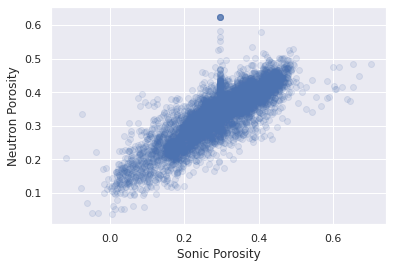

In [2]:
df = pd.read_csv(r'well_data.csv')
X = df['SPHI'].values
y = df['NPOR'].values
plt.scatter(X,y, alpha=0.125)
plt.xlabel('Sonic Porosity')
plt.ylabel('Neutron Porosity')

Now we want to import `sklearn` and do a linear regression

In [3]:
from sklearn.linear_model import LinearRegression

We have to reshape the data first, before we can fit the regressor class with the `.fit()` method

In [4]:
X = X.reshape(-1,1)
regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

Once it is fit, we can call the `.score()` method to get the R-squared value

In [5]:
regression.score(X,y)

0.684658823387513

With the `.coef_` method we can get the regression coefficient

In [6]:
regression.coef_

array([0.64840049])

In [7]:
print('The coefficient is %s and the intercept is %s' % (regression.coef_[0], regression.intercept_))

The coefficient is 0.6484004916893047 and the intercept is 0.14459553417711768


Let's split our data so we can have a validation test dataset. We will use `train_test_split` from `sklearn` to separate out our data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=86)

Now we refit, our regressor on the training data

In [10]:
regression.fit(X_train, y_train)

LinearRegression()

And we can then score the regressor on the test data

In [11]:
regression.score(X_test,y_test)

0.6702725112892332

In [12]:
print('The coefficient is %s and the intercept is %s' % (regression.coef_[0], regression.intercept_))

The coefficient is 0.7358683278591421 and the intercept is 0.11968467893983342


Lastly, let's plot up our prediction, the training dataset, and the test dataset.

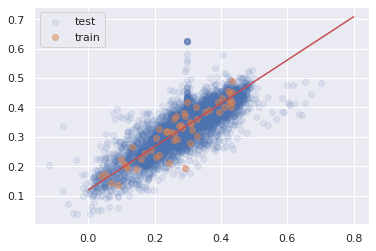

In [13]:
plt.scatter(X_test, y_test, alpha=0.1, label='test')
plt.scatter(X_train, y_train, alpha=0.5, label='train')
plt.legend()
plt.plot(np.linspace(0,0.8,3), regression.predict(np.linspace(0,0.8,3).reshape(-1,1)), c='r')